<a href="https://colab.research.google.com/github/ndq3004/machine_learning/blob/master/MachineLearningCoBan/SVM/KernelSupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from __future__ import print_function
import numpy as np
from sklearn import svm
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

ValueError: ignored

Thử các kernel với dữ liệu giả

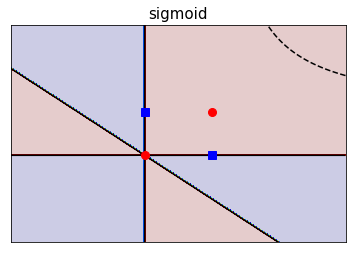

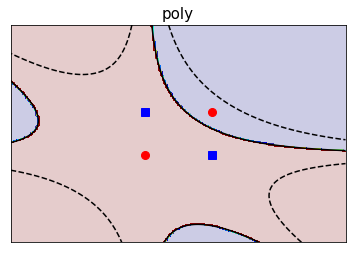

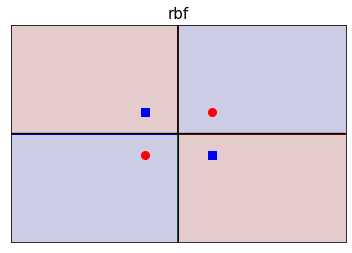

In [17]:
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as PdfPages
X = np.array([[0, 0], [1, 1], [1, 0], [0, 1]])
y = np.array([0, 0, 1, 1])
fignum = 1
#fit the model
for kernel in ('sigmoid', 'poly', 'rbf'):
  clf = svm.SVC(kernel=kernel, gamma=.4, coef0=0)
  clf.fit(X, y)

  fig, ax = plt.subplots()
  plt.figure(fignum, figsize=(4, 3))
  plt.clf()

  plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="None")
  plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
  plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)

  plt.axis('tight')
  x_min = -2
  x_max = 3
  y_min = -2
  y_max = 3

  XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
  Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(XX.shape)
  plt.figure(fignum, figsize=(4, 3))
  CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
  plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
              levels=[-.5, 0, .5])
  plt.title(kernel, fontsize = 15)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)

  plt.xticks(())
  plt.yticks(())
  fignum = fignum + 1
  # with PdfPages(kernel + '2.pdf') as pdf:
  #   fig, ax = plt.subplots()
  #   plt.figure(fignum, figsize=(4, 3))
    # plt.clf()

    # plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors="None")
    # plt.plot(X[:2, 0], X[:2, 1], 'ro', markersize = 8)
    # plt.plot(X[2:, 0], X[2:, 1], 'bs', markersize = 8)

    # plt.axis('tight')
    # x_min = -2
    # x_max = 3
    # y_min = -2
    # y_max = 3

    # XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    # Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # # Put the result into a color plot
    # Z = Z.reshape(XX.shape)
    # plt.figure(fignum, figsize=(4, 3))
    # CS = plt.contourf(XX, YY, np.sign(Z), 200, cmap='jet', alpha = .2)
    # plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
    #             levels=[-.5, 0, .5])
    # plt.title(kernel, fontsize = 15)
    # plt.xlim(x_min, x_max)
    # plt.ylim(y_min, y_max)

    # plt.xticks(())
    # plt.yticks(())
    # fignum = fignum + 1
    # pdf.savefig()
    # plt.show()

In [2]:
X_all = mnist.data/255.
y_all = mnist.target
digits = ['0', 1, 2, 3]
ids = []
for d in digits:
  ids.append(np.where(y_all == str(d))[0])
  # print(np.where(y_all == '1'))

selected_ids = np.concatenate(ids, axis = 0)
X = X_all[selected_ids]
y = y_all[selected_ids]
print('NUmber of sample: ', X.shape[0])

NUmber of sample:  28911


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=24000)
model = svm.SVC(kernel='rbf', gamma=.02, coef0=.1, verbose=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurracy: ', (100*accuracy_score(y_test, y_pred)))

[LibSVM]Acurracy:  98.82083333333334


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.1,
    decision_function_shape='ovr', degree=3, gamma=0.02, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=True)
